**DATA PRE-PROCESSING**

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import os
from nltk.tokenize import word_tokenize
from six.moves import cPickle as pickle
import pandas as pd
import seaborn as sns
import string
from time import time
import nltk
import xml.etree.ElementTree as ET
%matplotlib inline
#import xmltodict


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Stopwords.txt is downloaded from URL: https://algs4.cs.princeton.edu/35applications/stopwords.txt
stopwords = set(w.rstrip() for w in open(r'C:\UMASS\589\homework\extra credit\stopwords.txt'))


In [4]:
#looping over folder
all_reviews=[]
for root, dirs, filenames in os.walk('sorted_data/apparel'): 
    #print(filenames)
    for f in filenames:
        if f == "all.review":
            with open(os.path.join(root, f), 'r',encoding="Latin1") as file: 
                #print(file)
                reviews = file.readlines()
            #print(reviews)
                all_reviews.extend(reviews)

#all_reviews[0:100]

In [5]:
# Converting array of lines in xml to dictionary where each element is array of rating and review
def Convert2Dict(review_string):
    count = 0
    ElementArray = []
    Dictionary = {}
    for i in range(len(review_string)):
        if review_string[i] != '</review>\n':      
            if review_string[i] == '<rating>\n':
                ElementArray.append('rating:'+review_string[i+1])
            if review_string[i] == '<review_text>\n':
                ElementArray.append('review_text:'+review_string[i+1])
        elif review_string[i] == '</review>\n':
            count = count + 1
            r = 'review'+ str(count) 
            Dictionary[r] = ElementArray
            ElementArray = []
    return Dictionary
len(all_reviews)
print(all_reviews[0])

<review>



In [6]:
#Printing a sample output from function
All_revDict=Convert2Dict(all_reviews)
len(All_revDict)

9252

In [7]:
def Convert2DF(Dict):
 
    df = pd.DataFrame(columns=['rating','review_text'])
    for k,v in Dict.items():
        df.loc[k] = [v[0].split(":")[1].split("\n")[0], v[1].split(":")[1].split("\n")[0]]
    return df

In [8]:
All_reviewsDF=Convert2DF(All_revDict)
print(All_reviewsDF.describe())

       rating review_text
count    9252        9252
unique      4        8896
top       5.0            
freq     5983          25


In [9]:
#Adding Label Column and removing data with rating 3
All_reviewsDF['label'] = [0 if float(x)<3  else 1 for x in All_reviewsDF['rating']] 
All_reviewsDF= All_reviewsDF[pd.to_numeric(All_reviewsDF.rating) != 3.0]
#All_reviewsDF.drop(All_reviewsDF[All_reviewsDF['rating']=3],inplace=True)


In [10]:
def Remove_punct(All_reviewsDF):
#Removing punctuations
    for i in range(len(All_reviewsDF)):
        All_reviewsDF.iloc[i,1]=All_reviewsDF.iloc[i,1].translate(str.maketrans('', '', string.punctuation))
    return All_reviewsDF


In [11]:
Remove_punct(All_reviewsDF)

,rating,review_text,label
review1,1.0,I want to start by saying Fred Flare shipped t...,0
review2,1.0,I have to say that I was disappointed when I o...,0
review3,2.0,I am sorry but I did not like it nor will I we...,0
review4,1.0,A red star I bet this wont sell well in easte...,0
review5,1.0,Perhaps it is my own fault for not reading mor...,0
...,...,...,...
review9248,5.0,These runners are great,1
review9249,5.0,Cute little accessory for the price My slave ...,1
review9250,5.0,I bought this hat for my little boy and he lov...,1
review9251,5.0,This was a great fall hat for our newborn It c...,1


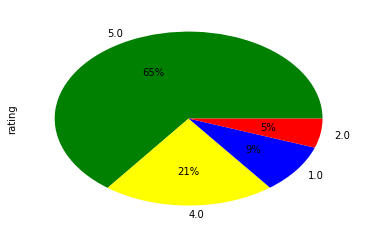

In [12]:
All_reviewsDF.rating.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "yellow", "blue","red"])

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
trainDF,testDF= train_test_split(All_reviewsDF, train_size=0.8,test_size=0.2,random_state=1)


trainDF,valDF= train_test_split(trainDF,train_size=0.9,  test_size=0.1, random_state=1)
print(trainDF.head())
print(testDF.head())
print(valDF.head())

           rating                                        review_text  label
review2512    5.0  I ordered these as a gift for my son  The qual...      1
review1106    5.0       These shoes keep my feet cozy all the way...      1
review3473    1.0  the hat is fine but size is not correct the ha...      0
review6960    5.0  theyre great  i love them i was afraid they mi...      1
review5629    4.0  The quality is great but the xlarge is too big...      1
           rating                                        review_text  label
review8775    4.0                 The quality of the product is good      1
review1407    5.0  These shoes are so comfortable and cute Ive go...      1
review5929    5.0  Everyone has different eyes but these fit me w...      1
review8534    4.0  I bought a black and a brown one and am pretty...      1
review1333    5.0  As the weather has cooled for fall and winter ...      1
           rating                                        review_text  label
review6940  

In [15]:
#Tokenizing the reviews and taking in array
def Tokenize(All_reviewsDF):
    Word_list=[]
    for i in range(len(All_reviewsDF)): 
    
        Word_list.extend(word_tokenize(All_reviewsDF.iloc[i,1]))
    
    return Word_list

Word_list=Tokenize(All_reviewsDF)
Word_list[0:100]

['I',
 'want',
 'to',
 'start',
 'by',
 'saying',
 'Fred',
 'Flare',
 'shipped',
 'this',
 'product',
 'very',
 'fast',
 'And',
 'the',
 'transaction',
 'itself',
 'was',
 'very',
 'smooth',
 'I',
 'do',
 'however',
 'have',
 'extreme',
 'problems',
 'with',
 'the',
 'product',
 'itself',
 'The',
 'product',
 'is',
 'not',
 'leather',
 'its',
 'nylon',
 'and',
 'it',
 'sort',
 'of',
 'looks',
 'cheap',
 'The',
 'inside',
 'material',
 'is',
 'sued',
 'but',
 'thats',
 'only',
 'the',
 'lining',
 'for',
 'the',
 'base',
 'of',
 'the',
 'wallet',
 'Also',
 'The',
 'wallet',
 'part',
 'is',
 'very',
 'hard',
 'to',
 'use',
 'You',
 'cant',
 'really',
 'put',
 'too',
 'much',
 'in',
 'the',
 'wallet',
 'The',
 'credit',
 'card',
 'slots',
 'are',
 'a',
 'little',
 'too',
 'snug',
 'and',
 'there',
 'is',
 'no',
 'place',
 'for',
 'my',
 'ID',
 'The',
 'wallet',
 'included',
 'a',
 'small',
 'note']

In [16]:
#Filtering the array and eliminating stopwords
def filter_words(Word_list):
    #print(stopwords)
    filterwords=[]
    for word in Word_list:
        if word not in stopwords:
            filterwords.append(word)
    return filterwords

filterwords=filter_words(Word_list)
print(filterwords[0:200])

['I', 'start', 'Fred', 'Flare', 'shipped', 'product', 'fast', 'And', 'transaction', 'smooth', 'I', 'extreme', 'problems', 'product', 'The', 'product', 'leather', 'nylon', 'sort', 'cheap', 'The', 'inside', 'material', 'sued', 'lining', 'base', 'wallet', 'Also', 'The', 'wallet', 'part', 'hard', 'You', 'put', 'wallet', 'The', 'credit', 'card', 'slots', 'a', 'snug', 'place', 'ID', 'The', 'wallet', 'included', 'a', 'small', 'note', 'book', 'doesnt', 'fit', 'wallet', 'I', 'excited', 'product', 'I', 'feel', 'duped', 'The', 'pictures', 'made', 'wallet', 'higher', 'quality', 'user', 'friendly', 'I', 'recommend', 'product', 'I', 'I', 'disappointed', 'I', 'opened', 'package', 'iPod', 'wallet', 'Its', 'cute', '60ish', 'cute', 'First', 'leather', 'nylon', 'The', 'lining', 'suede', 'photos', 'product', 'listing', 'misleading', 'Im', 'keeping', 'hassle', 'shipping', 'back', 'isnt', 'worth', 'It', 'job', 'wasnt', 'I', 'expecting', 'I', 'feel', 'ripped', 'I', 'I', 'I', 'wear', 'big', 'funny', 'I', 'I',

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kajal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
#Lemmatizing and stemming (bringing words to their root format) using NLTK
from nltk.stem import WordNetLemmatizer

def lemm_words(filteredwords):
    Lemmatized_words=[]
    lm=WordNetLemmatizer()


    for word in filterwords:
        word=word.lower()

        Lemmatized_words.append (lm.lemmatize(word))
    return Lemmatized_words
Lemmatized_words=lemm_words(filterwords)

In [19]:
#Converting in Bag of Words representation and sorting them by count
from collections import OrderedDict
def Convert2BOW(Lemmatized_words):
    BOW={}
    for w in Lemmatized_words:
        if w not in BOW:
            BOW[w]=1
        else:
            BOW[w]=BOW[w]+1
    SortedBOW = OrderedDict(sorted(BOW.items(), key=lambda x: x[1],reverse=True))
    SortedList=list(SortedBOW.items())
    return SortedList
SortedList=Convert2BOW(Lemmatized_words)
SortedList[0:10]

[('i', 16482),
 ('a', 11005),
 ('the', 3255),
 ('shoe', 2862),
 ('great', 2529),
 ('it', 1986),
 ('comfortable', 1953),
 ('size', 1794),
 ('fit', 1775),
 ('they', 1746)]

In [20]:
#Finding the most common 15 words

count=0
x=[]
y=[]
for i in SortedList:
    k,v=i
    if(count<15):
        x.append(k)
        y.append(v)
    else:
        break
    count+=1
print(x,y)
    

['i', 'a', 'the', 'shoe', 'great', 'it', 'comfortable', 'size', 'fit', 'they', 'wear', 'love', 'this', 'good', 'bought'] [16482, 11005, 3255, 2862, 2529, 1986, 1953, 1794, 1775, 1746, 1730, 1598, 1586, 1584, 1351]


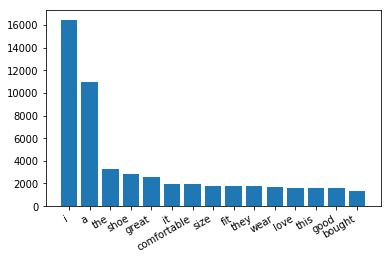

In [21]:
#Plotting the most common 15 words
fig, ax = plt.subplots()
ax.bar(x, y,)

fig.autofmt_xdate()
plt.show()

In [24]:
def Remove_shortwords(SortedList):
    for w in SortedList:
        k,v=w
        if(len(k)<4):
        #print(w)
            SortedList.remove(w)
    return SortedList
#print(SortedList)
#print(SortedList)
SortedList=Remove_shortwords(SortedList)
print(SortedList[0][0])


shoe


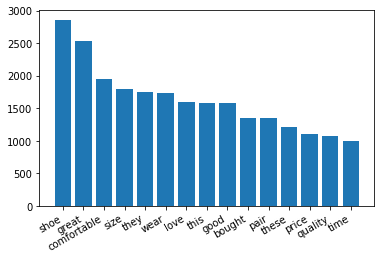

In [25]:
x=[]
y=[]
count=0
for i in SortedList:
    k,v=i
    #print(k,v)
    if(count<15):
        x.append(k)
        y.append(v)
    else:
        break
    count+=1
#print(x,y)
#Plotting the most common 15 words after deleting common words of length less than 3
fig, ax = plt.subplots()
ax.bar(x, y,)

fig.autofmt_xdate()
plt.show() 

In [31]:
with open('Vocab_apparel.review', 'w', encoding='utf-8') as file:
    for words in Lemmatized_words:
        file.write(words)
        file.write("\n")

In [32]:
with open('SortedBOW_apparel.review', 'w',encoding='utf-8') as file:
    for words in SortedList:
        file.write(str(words))
        file.write("\n")

In [33]:
import ast
BOW=[]

with open('SortedBOW.review','r') as f:
    BOW=f.readlines()
    
    for i in range(len(BOW)):
        BOW[i]=BOW[i].strip('\n')
        BOW[i]=(ast.literal_eval(BOW[i]))

    
print("Length of Vocabulary is",len(BOW))



Length of Vocabulary is 11677


In [34]:
##If using BOW feature vector!!!

##Feature vector is a vocabulary length sparse vector which contains count if 
#the word in review is among the vocabulary word.

def find_features(review):  
    feature=[]
    review_words= word_tokenize(review)
    for i in range(len(BOW)):
        #print(BOW[i][0])
        if  BOW[i][0] in review_words:
                feature.append(BOW[i][1])
        else:
                feature.append(0)

    return feature



 <font size="4" color='blue'> 

 **BUILD THE MODEL**
</font>

In [125]:
training_features=[]
testing_features=[]
val_features=[]
all_features=[]

for i in range(len(All_reviewsDF)):
    review=(All_reviewsDF.iloc[i]['review_text']+'\n') 
    review_token=word_tokenize(review)
    all_features.append(review_token)


for i in range(len(trainDF)):
    review=(trainDF.iloc[i]['review_text']+'\n') 
    review_token=word_tokenize(review)
    training_features.append(review_token)
#print(len(training_features))

for i in range(len(testDF)):
    review=(testDF.iloc[i]['review_text']+'\n') 
    test_token=word_tokenize(review)
    testing_features.append(test_token)

for i in range(len(valDF)):
    review=(valDF.iloc[i]['review_text']+'\n') 
    val_token=word_tokenize(review)
    val_features.append(val_token)
    
   
           
#print((all_features[0]))
y_train=np.array(trainDF['label'])
y_test=np.array(testDF['label'])
y_val=np.array(valDF['label'])




**Using Word2Vec Embeddings**

In [126]:
import gensim 
import logging
embedding_model = gensim.models.Word2Vec ()
embedding_model.build_vocab(all_features)
embedding_model.train(all_features, total_examples=len(training_features), epochs=20)


(5831132, 8426860)

In [127]:
## Creating word embeddings for all the reviews using Word2Vec model we trained. 

embedding_train=[]
for i in range(len(training_features)):
    sentence_embed=np.zeros(100)
    for j in range(len(training_features[i])):  
        try:
            sentence_embed+=(embedding_model[training_features[i][j]])
            
            
        except KeyError:
            sentence_embed+=np.zeros(100)
    #sentence_embed/= len(training_features[i])    
    #print(len(sentence_embed))
    #break
    embedding_train.append(sentence_embed)


embedding_test=[]
for i in range(len(testing_features)):
    sentence_embed=np.zeros(100)
    #print(i,len(training_features[i]))
    for j in range(len(testing_features[i])):  
        try:
            sentence_embed+=(embedding_model[testing_features[i][j]])
            
            
        except KeyError:
            sentence_embed+=np.zeros(100)

    embedding_test.append(sentence_embed)

    
embedding_val=[]
for i in range(len(val_features)):
    sentence_embed=np.zeros(100)
    #print(i,len(training_features[i]))
    for j in range(len(val_features[i])):  
        try:
            sentence_embed+=(embedding_model[val_features[i][j]])
            
            
        except KeyError:
            sentence_embed+=np.zeros(100)

    embedding_val.append(sentence_embed)

In [128]:
#Have a look at embeddings generated

print((embedding_val[0]))
print(type(embedding_val))

[-7.03123409e+00 -4.41942611e+00  1.34838349e+01 -5.83441714e+00
 -7.27071223e+00 -5.12801354e+01 -9.31370313e+00 -3.24810376e+00
 -1.34370274e+01 -8.37341866e+00 -9.10136793e+00 -2.29665311e-01
 -9.52931473e+00  1.83855174e+01 -2.35263283e+01  1.01444464e+01
  2.46193457e+01  2.54854954e+01  1.56705177e+01 -2.45818441e+01
  3.58553104e+01  6.70244496e-01  1.45619295e+00 -9.70892375e+00
  9.68273331e+00 -6.33434925e+00 -1.07106521e+01  1.60548059e+01
  2.67337197e+01 -2.96820518e+01  1.45259592e+01  5.01710861e+00
 -1.07833942e+01  1.14713159e+00  1.93962539e+01 -1.40788514e+00
 -1.10738151e+01 -2.80820919e+01  1.77218156e+01  7.40230314e+00
  1.18757510e+01  1.37691348e+01 -6.80988443e+00  1.46450514e+01
  2.98387556e+00  5.81155233e+00  8.16423038e-01  8.96045591e+00
  2.27448840e+01 -1.49567038e+00  3.27194335e+00  9.31346549e+00
 -1.79731291e+01  5.25980120e+00 -6.81019067e+00  1.11028453e+01
 -1.42616080e+01  9.54133222e+00 -2.38791481e-02  2.22169612e+01
 -1.69526105e+01 -4.00475

In [132]:
#Using SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()
model.fit(embedding_train, y_train)
y_pred = model.predict(embedding_test)
y_val_pred=model.predict(embedding_val)
acc = accuracy_score(y_test, y_pred)
val_acc = accuracy_score(y_val, y_val_pred)
y_pred_train= model.predict(embedding_train)
acc_train = accuracy_score(y_pred_train, y_train)
print("Training Accuracy on the Apparel dataset: {:.2f}".format(acc_train*100))
print("Validation Accuracy on the Apparel dataset: {:.2f}".format(val_acc*100))
print("Test Accuracy on the Apparel dataset: {:.2f}".format(acc*100))

Training Accuracy on the Apparel dataset: 85.53
Validation Accuracy on the Apparel dataset: 84.75
Test Accuracy on the Apparel dataset: 85.52


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(embedding_train, y_train)
y_pred = model.predict(embedding_test)
y_val_pred=model.predict(embedding_val)
acc_test = accuracy_score(y_test, y_pred)
val_acc = accuracy_score(y_val, y_val_pred)
y_pred_train= model.predict(embedding_train)
acc_train = accuracy_score(y_pred_train, y_train)
print("Train Accuracy on the Apparel dataset: {:.2f}".format(acc_train*100))
print("Validation Accuracy on the Apparel dataset: {:.2f}".format(val_acc*100))
print("Test Accuracy on the Apparel dataset: {:.2f}".format(acc_test*100))

Train Accuracy on the Apparel dataset: 99.92
Validation Accuracy on the Apparel dataset: 80.43
Test Accuracy on the Apparel dataset: 81.09


In [130]:
#Using logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(embedding_train, y_train)
y_pred = model.predict(embedding_test)
y_val_pred=model.predict(embedding_val)
acc = accuracy_score(y_test, y_pred)
val_acc = accuracy_score(y_val, y_val_pred)
y_pred_train= model.predict(embedding_train)
acc_train = accuracy_score(y_pred_train, y_train)
print("Train Accuracy on the Apparel dataset: {:.2f}".format(acc_train*100))
print("Validation Accuracy on the Apparel dataset: {:.2f}".format(val_acc*100))
print("Test Accuracy on the Apparel dataset: {:.2f}".format(acc*100))


Train Accuracy on the Apparel dataset: 88.36
Validation Accuracy on the Apparel dataset: 89.07
Test Accuracy on the Apparel dataset: 87.52


In [56]:
#Using Neural Network
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        ## TODO: define the layers of the network
        self.fc0 = nn.Linear(100, 70)
        
        self.fc1= nn.Linear(70, 1)
        self.fc2= nn.Sigmoid()
        



    def forward(self, x):
       
        x = self.fc0(x)
        x=F.tanh(x)
       
        x=self.fc1(x)
        x=F.tanh(x)
        x = self.fc2(x)
        #print(x)
       
        return x
    def predict(self,x):
        x=self.forward(x)
        output=np.zeros(len(x))
        for i in range(len(x)):
            if x[i]>=0.5:
                output[i]=1
            
        return output
        
        


def train(model, embedding_train, epoch,learning_rate,y_train):
    model.train()
    correct = 0
    loss_list=[]
    #Data type conversion for model input
    embedding_train= np.array(embedding_train)
    embedding_train=torch.from_numpy(embedding_train).double()
    y_train= np.array(y_train)
    y_train=torch.from_numpy(y_train).double()
    
    model.double()
    #Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for n in range(epoch):   
             
            #print(sent_embed)
            
            optimizer.zero_grad()
            model.double()
            output = model(embedding_train)
            #print(output)
            #output=output.detach().numpy()
            #print((output.size), (y_train.size))
            criterion = nn.L1Loss()
            #print(output)
            #print(output)
            loss = criterion(output, y_train)
            
            #loss = nn.MSELoss(output, y_train[i])
            loss.backward()
            optimizer.step()
        
            loss_list.append(loss)
    output=output.detach().numpy()
    y_train=y_train.detach().numpy()
    for i in range(len(output)):
        if output[i]>=0.5:
            output[i]=1
        else:
            output[i]=0
            
    accuracy = accuracy_score(output, y_train)
    #print(loss_list)
    return accuracy




In [57]:
#Sanity check
model=NNet()
accuracy=train(model,embedding_train,100,0.1,y_train)
print("For epoch 100 we get training accuracy of",accuracy*100)



For epoch 100 we get training accuracy of 85.43543543543544


In [61]:
##Predicting accuracy on Neural Networks
embedding_test= np.array(embedding_test)
embedding_test=torch.from_numpy(embedding_test).double()
y_pred=model.predict(embedding_test)
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy achieved",accuracy)
y_pred_val=model.predict(torch.from_numpy(np.array(embedding_val)))
accuracy_val = accuracy_score(y_pred_val, y_val)
print("Validation accuracy achieved",accuracy_val)

Test accuracy achieved 0.8568341437061048
Validation accuracy achieved 0.8434547908232118


**Logistic Regression and hyper parameter tuning**

Hyper Parameter tuning using grid search

In [133]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']

model=LogisticRegression()
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)


best_model = clf.fit(embedding_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
# Predict target vector


Best Penalty: l1
Best C: 1.0


In [87]:
print("Best Accuracy",best_model.best_score_)

Best Accuracy 0.8738738738738738


In [88]:
y_pred=best_model.predict(embedding_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8741220961642355


**Cross domain Sentiment Analysis**

Since our model (best_model) is already trained on apparel

In [214]:
review_electronic=[]
for root, dirs, filenames in os.walk('sorted_data/software'): 
    
    #print(filenames)
    for f in filenames:
        if f == "all.review":
            with open(os.path.join(root, f), 'r',encoding="Latin1") as file: 
                #print(file)
                reviews = file.readlines()
            #print(reviews)
                review_electronic.extend(reviews)
print(len(review_electronic))            

93808


In [215]:
electronics_dict=Convert2Dict(review_electronic)
Electronics_reviewsDF=Convert2DF(electronics_dict)
print(Electronics_reviewsDF.describe())

       rating review_text
count    2390        2390
unique      4        2055
top       5.0            
freq      946           7


In [216]:
#Adding Label Column and removing data with rating 3
Electronics_reviewsDF['label'] = [0 if float(x)<3  else 1 for x in Electronics_reviewsDF['rating']] 
Electronics_reviewsDF= Electronics_reviewsDF[pd.to_numeric(Electronics_reviewsDF.rating) != 3.0]
#All_reviewsDF.drop(All_reviewsDF[All_reviewsDF['rating']=3],inplace=True)
Electronics_reviewsDF.head()


,rating,review_text,label
review1,2.0,The Easy Language 16 is only useful if you're ...,0
review2,1.0,"My boss asked me to get this, so that he check...",0
review3,1.0,I found this title messing around adding thing...,0
review4,1.0,They have the hebrew backwards!! You are suppo...,0
review5,2.0,I just bought and installed this CD with the h...,0


In [217]:
Electronics_reviewsDF=Remove_punct(Electronics_reviewsDF)
Electronics_reviewsDF.head()

,rating,review_text,label
review1,2.0,The Easy Language 16 is only useful if youre a...,0
review2,1.0,My boss asked me to get this so that he check ...,0
review3,1.0,I found this title messing around adding thing...,0
review4,1.0,They have the hebrew backwards You are suppose...,0
review5,2.0,I just bought and installed this CD with the h...,0


In [218]:

elect_all_features=[]

for i in range(len(Electronics_reviewsDF)):
    review=(Electronics_reviewsDF.iloc[i]['review_text']+'\n') 
    review_token=word_tokenize(review)
    elect_all_features.append(review_token)

y_elect=np.array(Electronics_reviewsDF['label'])




In [219]:
embedding_elect=[]
for i in range(len(elect_all_features)):
    sentence_embed=np.zeros(100)
    for j in range(len(elect_all_features[i])):  
        try:
            sentence_embed+=(embedding_model[elect_all_features[i][j]])
            
            
        except KeyError:
            sentence_embed+=np.zeros(100)
    #sentence_embed/= len(training_features[i])    
    #print(len(sentence_embed))
    #break
    embedding_elect.append(sentence_embed)


In [220]:
embedding_elect[0]

array([-1.15516045e+01,  9.72924771e+00,  1.30148388e+01, -2.79640004e+01,
       -3.18208283e+01, -5.66546929e+01, -1.55762292e+01, -2.33851654e+01,
       -3.16106676e+01, -2.33302554e+00,  1.17891825e+01, -2.73422148e+01,
       -1.39257873e+01, -1.40589091e+01, -1.84654624e+01, -4.47790979e+00,
       -1.08420771e+01, -5.69993739e+00,  9.36300403e+00,  3.44560754e+00,
        7.49086894e+01, -2.85224964e+01,  9.88193194e+00,  5.61779266e+00,
        2.62483850e+01, -2.30552706e+01,  3.71579727e+00, -2.35465647e+01,
       -4.31140380e+01, -4.34263754e+01,  4.95473301e+01, -3.06767776e+01,
       -8.93681878e+00, -2.62144940e+00,  3.04256275e+01, -4.91752891e+01,
       -1.27758844e+01, -3.11627082e+01,  7.79701384e-01, -2.71279769e+01,
        1.47654702e+00, -4.25512208e+01, -5.87488334e+00,  5.83242627e+01,
       -6.74361953e-01,  1.60731794e+01, -5.18799790e+01,  9.84385023e+00,
        5.34251183e+01, -1.22532966e+01, -5.91434762e+00, -1.92770889e+01,
       -1.39459981e+01,  

In [221]:
# Predicting accuracy of Electronics dataset with model trained on apparel dataset
y_pred_elect=best_model.predict(embedding_elect)
accuracy = accuracy_score(y_pred_elect, y_elect)
print(accuracy)

0.6661087866108787


In [224]:
embedding_model['great']

array([ 0.5497685 , -0.5294993 ,  0.8387564 , -2.4905634 , -1.8044223 ,
       -1.4215271 , -1.580634  , -1.1401933 ,  0.5886975 , -1.7303919 ,
        1.1567503 ,  0.9216216 , -0.18483867, -0.14392003, -1.7880529 ,
        2.4812703 ,  0.6502478 , -1.1256831 , -2.4194412 ,  1.397954  ,
        0.35781333,  0.49746418,  1.5225716 , -0.6114283 ,  0.4513157 ,
        0.99059147,  0.44323117,  0.6643514 , -0.11040936,  1.6614512 ,
       -0.2500513 , -0.4827413 , -2.6216667 , -0.14780532,  0.1430922 ,
       -0.69342554, -1.6852834 ,  1.0008271 , -0.6301994 ,  0.52214384,
        3.8148146 ,  1.1863334 ,  0.4283529 ,  0.9271137 , -1.3146844 ,
       -0.07443464,  0.65257156, -0.47543976, -1.9024488 , -2.0236619 ,
        0.36670175,  0.23219962, -2.8791354 , -0.45275956,  3.1515045 ,
        0.15752256, -0.7299687 ,  0.301375  ,  0.34666047, -0.10076039,
       -1.6757814 , -1.6883842 ,  1.4153656 , -0.73823905,  0.35463142,
       -0.48052135, -1.6307536 , -2.501925  , -0.05882717, -1.98

In [225]:
embedding_model['good']

array([ 0.28334528, -0.6276286 ,  0.76382893, -3.6113136 , -1.4474573 ,
        0.35960224, -1.9241658 , -0.9326837 , -0.5032284 ,  1.1272113 ,
        0.5667986 ,  1.890621  ,  0.6719114 ,  0.16712682, -1.4556774 ,
        0.69471985,  0.22749427,  0.03120996, -2.2587857 , -0.55798566,
        0.4833568 ,  0.8939631 ,  0.23178181, -0.5641131 ,  0.295867  ,
        1.7794629 , -0.3563487 ,  0.55849177, -0.5982723 , -0.7573021 ,
        0.9126217 , -0.8398385 , -3.0302527 , -0.9938609 ,  0.7319837 ,
       -2.3686566 , -1.5260478 ,  0.33950713, -1.1217943 ,  0.7412025 ,
        2.6999373 , -0.34824288,  1.5824373 ,  1.2223248 , -1.4833747 ,
        0.05283989,  0.368774  ,  0.10886303, -2.15552   , -1.5819077 ,
       -1.1741098 ,  0.73239577, -1.9196717 ,  0.03832009,  2.7097623 ,
        0.31660965, -1.3187572 ,  0.9241434 , -1.7346336 ,  0.72552115,
       -3.0750635 , -1.1778128 ,  0.43651342, -2.5453472 ,  1.9010719 ,
        0.38258752, -1.904722  , -2.2666934 ,  0.14730553, -0.96